# INM702 - Coursework TASK 1

## 1.1 Import required libraries for task

In [ ]:
import numpy as np
import pandas as pd
import keras
from matplotlib import pyplot as plt

In [ ]:
# Use keras to import MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

## 1.2 Data inspection and preparation

Before procesing, we need to check the MNIST Data.
First we plot one sample image to see what our input data look like

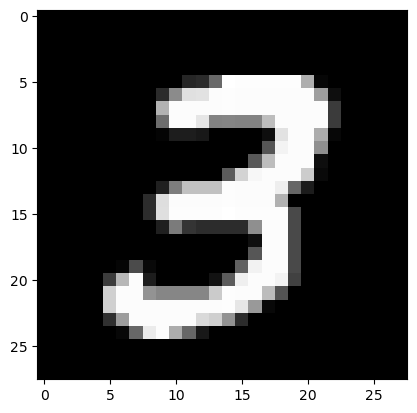

The number shown on image is: 3


In [ ]:
# Plot a sample image
sample = 7
image = X_train[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()
print("The number shown on image is:", y_train[sample])

Then we print the size of the arrays we have created just to make sure they are as expected

In [ ]:
print ("shape of X_train {}".format(X_train.shape))
print ("shape of X_test {}".format(X_test.shape))
print ("shape of y_train {}".format(y_train.shape))
print ("shape of y_test {}".format(y_test.shape))

shape of X_train (60000, 28, 28)
shape of X_test (10000, 28, 28)
shape of y_train (60000,)
shape of y_test (10000,)


Finally we print one data sample to see what it is like

In [ ]:
X_train[7]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  43,
        105, 255, 253, 253, 253, 253, 253, 174,   6,   0,   0,   0,   0,
          0,   0],
       [  

We can see that our input is a 28x28 array of integers with values in the range 0 to 255. These correspond to the input image size which is 28x28 pixels and the values represent the colour intensity of each pixel in the image in the greyscale range. 0 is black, 255 is white and the values in between are shades of grey. This can also be confirmed by the image that we have plotted above.   

In order to feed the data into our NN we need to "flatten" the 28x28 array into one dimension array containing all 784 elements and preserving the total number of input samples. We print the resulting size.

In [ ]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

print ("new shape of X_train {}".format(X_train.shape))
print ("new shape of X_test {}".format(X_test.shape))
X_train[7]

new shape of X_train (60000, 784)
new shape of X_test (10000, 784)


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  38,  43, 105, 255, 253,
       253, 253, 253, 253, 174,   6,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  43, 139, 224, 22

Since all our features are integer values that range from 0 to 255 it is not absolutely necessary to standardize our input data. However we will perform a simple scaling of the data by dividing all values by the max value 255

In [ ]:
X_train = X_train/255
X_test = X_test/255
X_train[7]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## 2.1 Neural Network Implementation

In [8]:
import numpy as np

class MyNeuralNetwork:
    def __init__(self,input_size,hidden_sizes,output_size,activation_function,dropout):
        self.layer_sizes = [input_size] + hidden_sizes + [output_size] # Number of neurons in each layer
        self.activation_function = activation_function                 # Activation function to use
        self.dropout = dropout                                         # Dropout probability
        self.weights = []                                              # Weights for each layer
        self.biases = []                                               # Biases for each layer
        self.input_size = input_size                                   # Input size
        self.output_size = output_size                                 # Output size              
        self.hidden_sizes = hidden_sizes                               # Hidden layer sizes

        for i in range(len(self.layer_sizes) - 1):
            self.weights.append(np.random.uniform(-0.5, 0.5, (self.layer_sizes[i+1], self.layer_sizes[i])))
            self.biases.append(np.zeros((self.layer_sizes[i+1], 1)))

            #Debug: Print shapes
            print(f"Weights in layer : {i}, Weights shape: {self.weights[i].shape}, Biases shape: {self.biases[i].shape}")
    
    #Staticmethod is used to call the function without creating an object
    #In this way we can call them in the activation function and deactivation function
    @staticmethod  
    def ReLU(Z):
        return np.maximum(0,Z)
    
    @staticmethod
    def derivative_ReLU(Z):
        return Z > 0
    
    @staticmethod
    def sigmoid(Z):
        # Cap the values of Z within the range [-700, 700], to prevent overflow
        Z = np.clip(Z, -700, 700)
        return 1 / (1 + np.exp(-Z))
    
    @staticmethod
    def derivative_sigmoid(Z):
        return MyNeuralNetwork.sigmoid(Z) * (1 - MyNeuralNetwork.sigmoid(Z))
    
    @staticmethod
    def softmax(Z):
        Z_exp = np.exp(Z - np.max(Z, axis=0))
        sum_Z_exp = np.sum(Z_exp, axis=0)
        softmax_output = Z_exp / sum_Z_exp
        return softmax_output
        
    def one_hot(self,Y):
        num_classes = self.output_size
        one_hot = np.zeros((Y.size,num_classes))
        one_hot[np.arange(Y.size), Y] = 1
        return one_hot.T
        
    def activation(self,Z):
        if self.activation_function == 'relu':
            return self.ReLU(Z)
        elif self.activation_function == 'sigmoid':
            return self.sigmoid(Z)
        elif self.activation_function == 'softmax':
            return self.softmax(Z)
        else:
            raise Exception('Activation function not supported')
        
    def derivative_activation(self,A):
        if self.activation_function == 'relu':
            return self.derivative_ReLU(A)
        elif self.activation_function == 'sigmoid':
            return self.derivative_sigmoid(A)
        else:
            raise Exception('Activation function not supported')
        
    def calculate_loss(self,A3,Y):
        # Calculate the loss using the cross-entropy loss function
        #Calcuation should be based on y_pred and y_true
        y_pred = A3
        y_true = self.one_hot(Y)

        #Clip the y_prediction between epsilon and 1 - epsilon to prevent log(0) error
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)

        #Calculate the loss as multi-class cross-entropy loss
        loss = - y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)
        loss = np.sum(loss) / Y.size

        return loss
        
    def forward_prop(self,X):
        # Forward propagation
        A = X.T
        layer_outputs = {}
        D = {} # Dropout mask matrices

        #Loop over each layer in the network
        for layer in range(len(self.layer_sizes)-1):
            # Compute the linear output Z for the current layer
            Z = self.weights[layer].dot(A) + self.biases[layer]

            #Check for the if not the last layer, and apply the activation function
            if (layer != len(self.layer_sizes) - 2 ):
                A = self.activation(Z)
                #Check for dropout and apply it accordingly 
                if self.dropout > 0: #apply dropout

                    '''

                    This line of code for dropout inspired from Andrew Ng's Deep Learning Specialization Course
                    https://www.youtube.com/watch?v=D8PJAL-MZv8
                    '''       

                    #Create a dropout mask matrix to be applied to a subset of neurons
                    D[layer] = np.random.rand(*A.shape) > self.dropout
                    #Apply the mask to A
                    A = A * D[layer]
                    #Normalize A to not to change expected value of A as keeping  probability
                    A = A / (1 - self.dropout)
                    
            #if there is no dropout
            else: #for the last layer use softmax activation function
                A = self.softmax(Z)
            layer_outputs[layer] = (A,Z)
            #Debuging: Print shapes
            #print(f"Forward Propagation, Layer: {layer}, A shape: {A.shape}, Z shape: {Z.shape}")
        
        return layer_outputs,D
    
    def backward_prop(self, X, Y, layer_outputs, D):

        m = X.shape[0]  # Number of training examples
        Y = self.one_hot(Y)  # One hot encode the labels
        gradients = {}  # Dictionary to store the gradients for each layer
        dZ = None 
        for layer in reversed(range(len(self.layer_sizes) - 1)): # Layers are backwardley calculate the gradients
            A, Z = layer_outputs[layer]                          # Get the layer's activations and linear outputs

            if layer == len(self.layer_sizes) - 2:  # Gradient for the last layer
                dZ = A - Y
                
            else:                                  # Gradient for the hidden layers
                dA = np.dot(self.weights[layer + 1].T, dZ)
                if self.dropout > 0:               # Apply dropout   
                    dA *= D[layer]
                dZ = dA * self.derivative_activation(Z)

            prev_A = layer_outputs[layer - 1][0] if layer != 0 else X.T     #If layer is not last one takes the previous layer's activation
                                                                            #If layers is last one takes the input X
            # Debugging: Print shapes
            #print(f" Backward_prop ,Layer: {layer}, prev_A shape: {prev_A.shape}, dZ.T shape: {dZ.T.shape}")

            #Calculate the gradients for each layer  and store them in gradients dictionary
            dW = np.dot(dZ, prev_A.T) / m
            db = np.sum(dZ, axis=1, keepdims=True) / m

            gradients[layer] = (dW, db)

        return gradients
          
    def update_gradient(self,gradients,learning_rate):
        # Update the weights and biases using gradient descent
        for layer in range(len(self.layer_sizes) - 1): 
            dW,db = gradients[layer]
            self.weights[layer] -= learning_rate * dW
            self.biases[layer] -= learning_rate * db
  
    def train(self,X,Y,learning_rate,epochs,batch_size,decay_rate,decay_step): 
        """
        Trains the neural network using the given training data.

        Parameters:
        self : MyNeuralNetwork
            The neural network object to train.
            

        X = numpy.ndarray
            The input data, where each row is a training example and each column is a feature.

        Y = numpy.ndarray
            The labels for each training example, where each row is a label. Must have the same number of rows as X.

        learning_rate : float
            The learning rate to use for weight updates in gradient descent.
        epochs : int
            The number of times to iterate over the entire training set.

        batch_size : int
            The number of training examples to split the training set into for mini-batch gradient descent.
        
        Returns:
        None
        """
        m = X.shape[0]
        losses = [] # Array to store the loss at each epoch
        accuracies = [] # Array to store the accuracy at each epoch
        learning_rate = learning_rate

        for epoch in range(epochs):
            epoch_loss = 0
            epoch_correct = 0

            #Applying the learning rate decay at specific steps
            if(epoch % decay_step == 0 and epochs != 0):
                learning_rate = learning_rate * (1.0/ (1.0 +decay_rate * epoch))

                #Print the new learning rate at each decay step
                print(f'The learning rate at epoch {epoch} is :{learning_rate}')

            #Shuffle the dataset at the start of each epoch
            permutation = np.random.permutation(m)
            X_shuffled = X[permutation]
            Y_shuffled = Y[permutation]

            #Divide the dataset into mini-batches  
            for i in range(0,m - (m % batch_size),batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                Y_batch = Y_shuffled[i:i+batch_size]

                # Forward propagation
                layer_outpus,D = self.forward_prop(X_batch )

                # Calculate the loss and store it
                last_layer = len(self.layer_sizes) - 2
                loss = self.calculate_loss(layer_outpus[last_layer][0], Y_batch)
                epoch_loss += loss

                # Calculate the number of correct predictions
                predictions = np.argmax(layer_outpus[last_layer][0], axis=0)
                actuals = (Y_batch)
                epoch_correct += np.sum(predictions == actuals)
               
                # Backward propagation
                gradients=self.backward_prop(X_batch, Y_batch, layer_outpus,D)

                # Updating gradients
                self.update_gradient(gradients,learning_rate)

            #Calculate the average loss for this epoch and store it 
            average_epoch_loss = epoch_loss / (m // batch_size)
            average_epoch_accuracy = epoch_correct / (m)
            accuracies.append(average_epoch_accuracy)
            losses.append(average_epoch_loss)

            #Print the loss at each epoch with decimal point 5
            print(f'In  epoch  {epoch} loss  is : {average_epoch_loss:.5f} and accuracy is: {average_epoch_accuracy:.5f}')
            
        return losses,accuracies
            
    def predict(self,X):
        layer_outputs,_ = self.forward_prop(X)
        last_layer_acitvation = layer_outputs[len(self.layer_sizes) - 2][0]
        predictions = np.argmax(last_layer_acitvation, axis=0)
        return (last_layer_acitvation,predictions)

    def accuracy_score(self,X,Y):
        #The last layer of A3 is the probabilistic values of each class to calculate loss 
        last_layer_activation,predictions = self.predict(X)

        size = Y.size
                
        correct = np.sum(predictions == Y)
        accuracy = correct / size
        return last_layer_activation,accuracy

    def test(self,X,Y):
        last_layer_acitvation,accuracy = self.accuracy_score(X,Y)
        test_loss = self.calculate_loss(last_layer_acitvation, Y)
        
        return test_loss,accuracy                 

## 3.1 Network Evaluation for different Configurations

### 3.2 Evaluation of training and test loss with progressively complex architectures

Tests with Sigmoid function, no dropout

In [10]:
# Create a dictionary that contains all the loss and accuracy values for each model
#test_results = {}

#Create a list for test and training accuracy 
test_accuracy = []
train_accuracy = []


# Initialise 3 lists for storing nn_name, train_loss and test_loss
nn_type = []
training_loss = []
testing_loss = []

# NN1
# Create a neural network object
nn1 = MyNeuralNetwork(input_size=784, hidden_sizes=[4], output_size=10, activation_function='sigmoid',dropout=0.0)
nn_type.append('1H4N')
# Train the neural network
losses,accuracies = nn1.train(X_train, y_train, learning_rate=1, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn1.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

#Append the test and train accuracy to the list
train_accuracy.append(accuracies)
test_accuracy.append(acc)



# NN2
# Create a neural network object
nn2 = MyNeuralNetwork(input_size=784, hidden_sizes=[16], output_size=10, activation_function='sigmoid',dropout=0.0)
nn_type.append('1H16N')
# Train the neural network
losses,accuracies = nn2.train(X_train, y_train, learning_rate=1, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn2.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

#Append the test and train accuracy to the list
train_accuracy.append(accuracies)
test_accuracy.append(acc)


# NN3
# Create a neural network object
nn3 = MyNeuralNetwork(input_size=784, hidden_sizes=[64], output_size=10, activation_function='sigmoid',dropout=0.0)
nn_type.append('1H64N')
# Train the neural network
losses,accuracies = nn3.train(X_train, y_train, learning_rate=1, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn3.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

#Append the test and train accuracy to the list
train_accuracy.append(accuracies)
test_accuracy.append(acc)


# NN4
# Create a neural network object
nn4 = MyNeuralNetwork(input_size=784, hidden_sizes=[128], output_size=10, activation_function='sigmoid',dropout=0.0)
nn_type.append('1H128N')
# Train the neural network
losses,accuracies = nn4.train(X_train, y_train, learning_rate=1, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn4.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

#Append the test and train accuracy to the list
train_accuracy.append(accuracies)
test_accuracy.append(acc)


# NN5
# Create a neural network object
nn5 = MyNeuralNetwork(input_size=784, hidden_sizes=[64,16], output_size=10, activation_function='sigmoid',dropout=0.0)
nn_type.append('2H64x16N')
# Train the neural network
losses,accuracies = nn5.train(X_train, y_train, learning_rate=1, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn5.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

#Append the test and train accuracy to the list
train_accuracy.append(accuracies)
test_accuracy.append(acc)


# NN6
# Create a neural network object
nn6 = MyNeuralNetwork(input_size=784, hidden_sizes=[128,64], output_size=10, activation_function='sigmoid',dropout=0.0)
nn_type.append('2H128x64N')
# Train the neural network
losses,accuracies = nn6.train(X_train, y_train, learning_rate=1, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn6.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

#Append the test and train accuracy to the list
train_accuracy.append(accuracies)
test_accuracy.append(acc)

# NN7
# Create a neural network object
nn7 = MyNeuralNetwork(input_size=784, hidden_sizes=[128,64,16], output_size=10, activation_function='sigmoid',dropout=0.0)
nn_type.append('3H128x64x16N')
# Train the neural network
losses,accuracies = nn7.train(X_train, y_train, learning_rate=1, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn7.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

#Append the test and train accuracy to the list
train_accuracy.append(accuracies)
test_accuracy.append(acc)


# NN8
# Create a neural network object
nn8 = MyNeuralNetwork(input_size=784, hidden_sizes=[256,128,32], output_size=10, activation_function='sigmoid',dropout=0.0)
nn_type.append('3H256x128x32N')
# Train the neural network
losses,accuracies = nn8.train(X_train, y_train, learning_rate=1, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn8.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

#Append the test and train accuracy to the list
train_accuracy.append(accuracies)
test_accuracy.append(acc)

# NN9
# Create a neural network object
nn9 = MyNeuralNetwork(input_size=784, hidden_sizes=[256,128,64,32], output_size=10, activation_function='sigmoid',dropout=0.0)
nn_type.append('4H256x128x64x32N')
# Train the neural network
losses,accuracies = nn9.train(X_train, y_train, learning_rate=1, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn9.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

#Append the test and train accuracy to the list
train_accuracy.append(accuracies)
test_accuracy.append(acc)


# NN10
# Create a neural network object
nn10 = MyNeuralNetwork(input_size=784, hidden_sizes=[256,128,64,32,16], output_size=10, activation_function='sigmoid',dropout=0.0)
nn_type.append('5H256x128x64x32x16N')
# Train the neural network
losses,accuracies = nn10.train(X_train, y_train, learning_rate=1, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn10.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

#Append the test and train accuracy to the list
train_accuracy.append(accuracies)
test_accuracy.append(acc)



Weights in layer : 0, Weights shape: (4, 784), Biases shape: (4, 1)
Weights in layer : 1, Weights shape: (10, 4), Biases shape: (10, 1)
The learning rate at epoch 0 is :1.0
In  epoch  0 loss  is : 1.41183 and accuracy is: 0.72975
In  epoch  1 loss  is : 1.06522 and accuracy is: 0.80843
In  epoch  2 loss  is : 1.01942 and accuracy is: 0.81695
In  epoch  3 loss  is : 0.99210 and accuracy is: 0.82248
In  epoch  4 loss  is : 0.97330 and accuracy is: 0.82683
In  epoch  5 loss  is : 0.96402 and accuracy is: 0.82923
In  epoch  6 loss  is : 0.96262 and accuracy is: 0.82875
In  epoch  7 loss  is : 0.95397 and accuracy is: 0.83128
In  epoch  8 loss  is : 0.95260 and accuracy is: 0.83210
In  epoch  9 loss  is : 0.95158 and accuracy is: 0.83165
The learning rate at epoch 10 is :0.5
In  epoch  10 loss  is : 0.90159 and accuracy is: 0.84240
In  epoch  11 loss  is : 0.89303 and accuracy is: 0.84302
In  epoch  12 loss  is : 0.88961 and accuracy is: 0.84400
In  epoch  13 loss  is : 0.88714 and accuracy

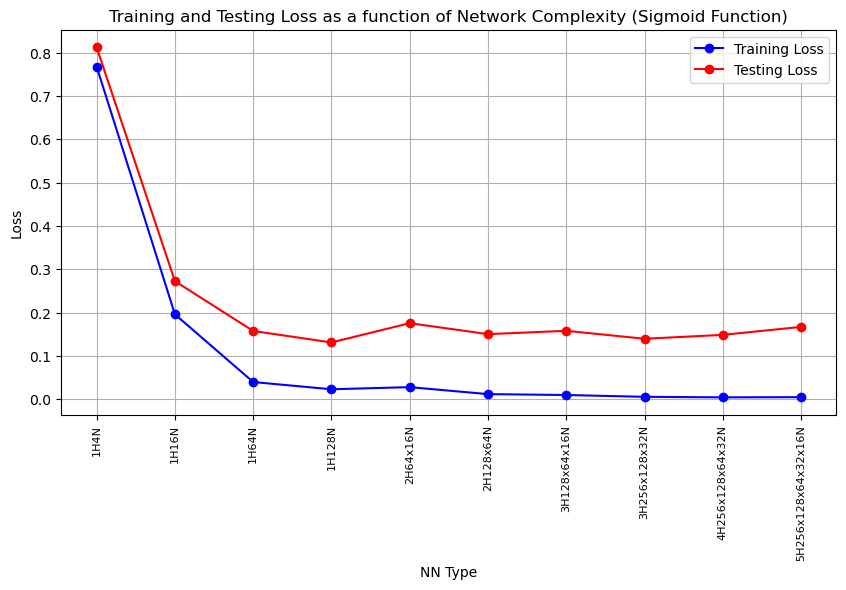

In [ ]:
# Plot graph of results
plt.figure(figsize=(10, 5))
plt.plot(nn_type, training_loss, label='Training Loss', color='blue', marker='o')
plt.plot(nn_type, testing_loss, label='Testing Loss', color='red', marker='o')
plt.title('Training and Testing Loss as a function of Network Complexity (Sigmoid Function)')
plt.xlabel('NN Type')
plt.ylabel('Loss')
plt.xticks(rotation=90,fontsize=8)
plt.legend()
plt.grid(True)
plt.tight_layout
plt.show()


TypeError: unhashable type: 'dict'

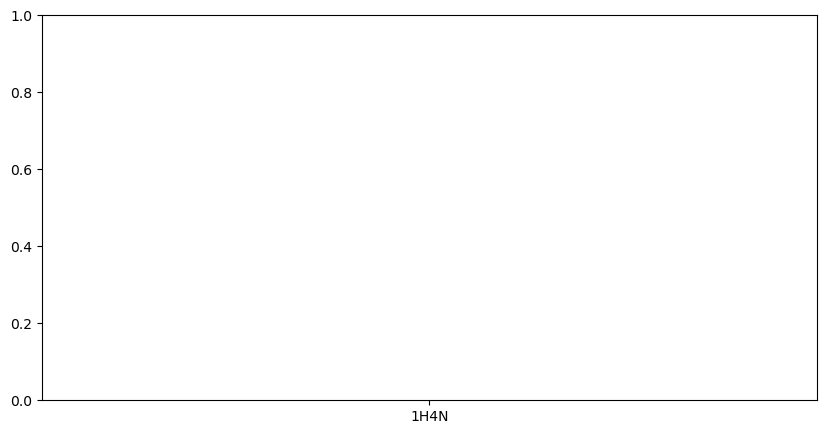

In [12]:
# Plot the train and test accuracy of each model as a function of network complexity
plt.figure(figsize=(10, 5))
plt.plot(nn_type, train_accuracy, label='Training Accuracy', color='blue', marker='o')
plt.plot(nn_type, test_accuracy, label='Testing Accuracy', color='red', marker='o')
plt.title('Training and Testing Accuracy as a function of Network Complexity (Sigmoid Function)')
plt.xlabel('NN Type')
plt.ylabel('Accuracy')
plt.xticks(rotation=90,fontsize=8)
plt.legend()
plt.grid(True)
plt.tight_layout
plt.show()

Tests with ReLU function, no dropout

In [ ]:


# Initialise 3 lists for storing nn_name, train_loss and test_loss
nn_type = []
training_loss = []
testing_loss = []

#Create a dic for test and training accuracy
test_accuracy = {}
train_accuracy = {}


# NN1
# Create a neural network object
nn1 = MyNeuralNetwork(input_size=784, hidden_sizes=[4], output_size=10, activation_function='relu',dropout=0.0)
nn_type.append('1H4N')
# Train the neural network
losses,accuracies = nn1.train(X_train, y_train, learning_rate=1, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn1.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

#Append the test and train accuracy to the dic
test_accuracy['1H4N'] = acc
train_accuracy['1H4N'] = accuracies


# NN2
# Create a neural network object
nn2 = MyNeuralNetwork(input_size=784, hidden_sizes=[16], output_size=10, activation_function='relu',dropout=0.0)
nn_type.append('1H16N')
# Train the neural network
losses,accuracies = nn2.train(X_train, y_train, learning_rate=1, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn2.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

#Append the test and train accuracy to the dic
test_accuracy['1H16N'] = acc
train_accuracy['1H16N'] = accuracies


# NN3
# Create a neural network object
nn3 = MyNeuralNetwork(input_size=784, hidden_sizes=[64], output_size=10, activation_function='relu',dropout=0.0)
nn_type.append('1H64N')
# Train the neural network
losses,accuracies = nn3.train(X_train, y_train, learning_rate=1, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn3.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

#Append the test and train accuracy to the dic
test_accuracy['1H64N'] = acc
train_accuracy['1H64N'] = accuracies

# NN4
# Create a neural network object
nn4 = MyNeuralNetwork(input_size=784, hidden_sizes=[128], output_size=10, activation_function='relu',dropout=0.0)
nn_type.append('1H128N')
# Train the neural network
losses,accuracies = nn4.train(X_train, y_train, learning_rate=1, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn4.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

#Append the test and train accuracy to the dic
test_accuracy['1H128N'] = acc
train_accuracy['1H128N'] = accuracies


# NN5
# Create a neural network object
nn5 = MyNeuralNetwork(input_size=784, hidden_sizes=[64,16], output_size=10, activation_function='relu',dropout=0.0)
nn_type.append('2H64x16N')
# Train the neural network
losses,accuracies = nn5.train(X_train, y_train, learning_rate=1, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn5.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

#Append the test and train accuracy to the dic
test_accuracy['2H64x16N'] = acc
train_accuracy['2H64x16N'] = accuracies

# NN6
# Create a neural network object
nn6 = MyNeuralNetwork(input_size=784, hidden_sizes=[128,64], output_size=10, activation_function='relu',dropout=0.0)
nn_type.append('2H128x64N')
# Train the neural network
losses,accuracies = nn6.train(X_train, y_train, learning_rate=1, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn6.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

#Append the test and train accuracy to the dic
test_accuracy['2H128x64N'] = acc
train_accuracy['2H128x64N'] = accuracies


# NN7
# Create a neural network object
nn7 = MyNeuralNetwork(input_size=784, hidden_sizes=[128,64,16], output_size=10, activation_function='relu',dropout=0.0)
nn_type.append('3H128x64x16N')
# Train the neural network
losses,accuracies = nn7.train(X_train, y_train, learning_rate=1, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn7.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

#aAppend the test and train accuracy to the dic
test_accuracy['3H128x64x16N'] = acc
train_accuracy['3H128x64x16N'] = accuracies

# NN8
# Create a neural network object
nn8 = MyNeuralNetwork(input_size=784, hidden_sizes=[256,128,32], output_size=10, activation_function='relu',dropout=0.0)
nn_type.append('3H256x128x32N')
# Train the neural network
losses,accuracies = nn8.train(X_train, y_train, learning_rate=1, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn8.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

#Append the test and train accuracy to the dic
test_accuracy['3H256x128x32N'] = acc
train_accuracy['3H256x128x32N'] = accuracies

# NN9
# Create a neural network object
nn9 = MyNeuralNetwork(input_size=784, hidden_sizes=[256,128,64,32], output_size=10, activation_function='relu',dropout=0.0)
nn_type.append('4H256x128x64x32N')
# Train the neural network
losses,accuracies = nn9.train(X_train, y_train, learning_rate=1, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn9.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

#aAppend the test and train accuracy to the dic
test_accuracy['4H256x128x64x32N'] = acc
train_accuracy['4H256x128x64x32N'] = accuracies

# NN10
# Create a neural network object
nn10 = MyNeuralNetwork(input_size=784, hidden_sizes=[256,128,64,32,16], output_size=10, activation_function='relu',dropout=0.0)
nn_type.append('5H256x128x64x32x16N')
# Train the neural network
losses,accuracies = nn10.train(X_train, y_train, learning_rate=1, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn10.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

#Append the test and train accuracy to the dic
test_accuracy['5H256x128x64x32x16N'] = acc
train_accuracy['5H256x128x64x32x16N'] = accuracies


Weights in layer : 0, Weights shape: (4, 784), Biases shape: (4, 1)
Weights in layer : 1, Weights shape: (10, 4), Biases shape: (10, 1)
The learning rate at epoch 0 is :1.0
In  epoch  0 loss  is : 2.26389 and accuracy is: 0.48498
In  epoch  1 loss  is : 2.46074 and accuracy is: 0.40313
In  epoch  2 loss  is : 2.42701 and accuracy is: 0.41755
In  epoch  3 loss  is : 2.45792 and accuracy is: 0.41862
In  epoch  4 loss  is : 2.67883 and accuracy is: 0.30673
In  epoch  5 loss  is : 2.67250 and accuracy is: 0.31378
In  epoch  6 loss  is : 2.31794 and accuracy is: 0.46443
In  epoch  7 loss  is : 2.42943 and accuracy is: 0.38165
In  epoch  8 loss  is : 2.19115 and accuracy is: 0.48393
In  epoch  9 loss  is : 2.13782 and accuracy is: 0.51233
The learning rate at epoch 10 is :0.5
In  epoch  10 loss  is : 1.58990 and accuracy is: 0.63427
In  epoch  11 loss  is : 1.54813 and accuracy is: 0.64913
In  epoch  12 loss  is : 1.51975 and accuracy is: 0.65852
In  epoch  13 loss  is : 1.52437 and accuracy

/Users/vitsiozo/anaconda3/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname N identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


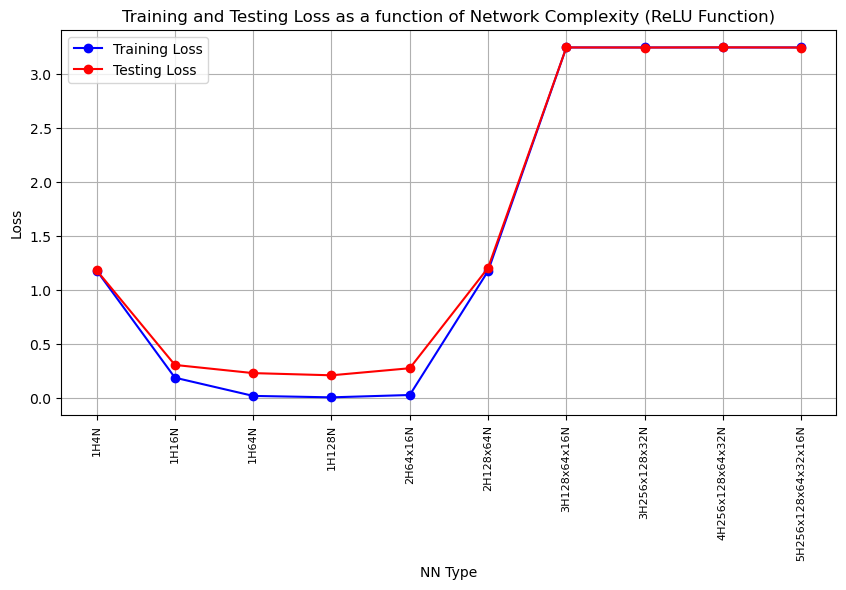

In [ ]:
# Plot graph of results
plt.figure(figsize=(10, 5))
plt.plot(nn_type, training_loss, label='Training Loss', color='blue', marker='o')
plt.plot(nn_type, testing_loss, label='Testing Loss', color='red', marker='o')
plt.title('Training and Testing Loss as a function of Network Complexity (ReLU Function)')
plt.xlabel('NN Type')
plt.ylabel('Loss')
plt.xticks(rotation=90,fontsize=8)
plt.legend()
plt.grid(True)
plt.tight_layout
plt.show()

### 3.3 Evaluation of training and test loss using different learning rates

Using Sigmoid function on a network with 1 hidden layer and 128 nodes. Learning decay = 0. Dropout = 0

In [ ]:

# Initialise 3 lists for storing learning rates, train_loss and test_loss
learningrate_values = []
training_loss = []
testing_loss = []

# Learning Rate = 1.5
# Create a neural network object
nn0 = MyNeuralNetwork(input_size=784, hidden_sizes=[128], output_size=10, activation_function='sigmoid',dropout=0.0)
# Train the neural network
losses,accuracies = nn0.train(X_train, y_train, learning_rate=1.5, epochs=25, batch_size=64,decay_rate=0,decay_step=10)
learningrate_values.append(1.5)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn0.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

# Learning Rate = 1
# Create a neural network object
nn1 = MyNeuralNetwork(input_size=784, hidden_sizes=[128], output_size=10, activation_function='sigmoid',dropout=0.0)
# Train the neural network
losses,accuracies = nn1.train(X_train, y_train, learning_rate=1, epochs=25, batch_size=64,decay_rate=0,decay_step=10)
learningrate_values.append(1)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn1.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

# Learning Rate = 0.5
# Create a neural network object
nn2 = MyNeuralNetwork(input_size=784, hidden_sizes=[128], output_size=10, activation_function='sigmoid',dropout=0.0)
# Train the neural network
losses,accuracies = nn2.train(X_train, y_train, learning_rate=0.5, epochs=25, batch_size=64,decay_rate=0,decay_step=10)
learningrate_values.append(0.5)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn2.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

# Learning Rate = 0.1
# Create a neural network object
nn3 = MyNeuralNetwork(input_size=784, hidden_sizes=[128], output_size=10, activation_function='sigmoid',dropout=0.0)
# Train the neural network
losses,accuracies = nn3.train(X_train, y_train, learning_rate=0.1, epochs=25, batch_size=64,decay_rate=0,decay_step=10)
learningrate_values.append(0.1)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn3.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

# Learning Rate = 0.01
# Create a neural network object
nn4 = MyNeuralNetwork(input_size=784, hidden_sizes=[128], output_size=10, activation_function='sigmoid',dropout=0.0)
# Train the neural network
losses,accuracies = nn4.train(X_train, y_train, learning_rate=0.01, epochs=25, batch_size=64,decay_rate=0,decay_step=10)
learningrate_values.append(0.01)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn4.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)



Weights in layer : 0, Weights shape: (128, 784), Biases shape: (128, 1)
Weights in layer : 1, Weights shape: (10, 128), Biases shape: (10, 1)
The learning rate at epoch 0 is :1.5
In  epoch  0 loss  is : 0.52371 and accuracy is: 0.90952
In  epoch  1 loss  is : 0.23842 and accuracy is: 0.95827
In  epoch  2 loss  is : 0.17285 and accuracy is: 0.97017
In  epoch  3 loss  is : 0.13607 and accuracy is: 0.97677
In  epoch  4 loss  is : 0.11067 and accuracy is: 0.98138
In  epoch  5 loss  is : 0.09234 and accuracy is: 0.98455
In  epoch  6 loss  is : 0.07646 and accuracy is: 0.98802
In  epoch  7 loss  is : 0.06465 and accuracy is: 0.98982
In  epoch  8 loss  is : 0.05428 and accuracy is: 0.99207
In  epoch  9 loss  is : 0.04575 and accuracy is: 0.99375
The learning rate at epoch 10 is :1.5
In  epoch  10 loss  is : 0.03915 and accuracy is: 0.99492
In  epoch  11 loss  is : 0.03321 and accuracy is: 0.99593
In  epoch  12 loss  is : 0.02820 and accuracy is: 0.99702
In  epoch  13 loss  is : 0.02443 and ac

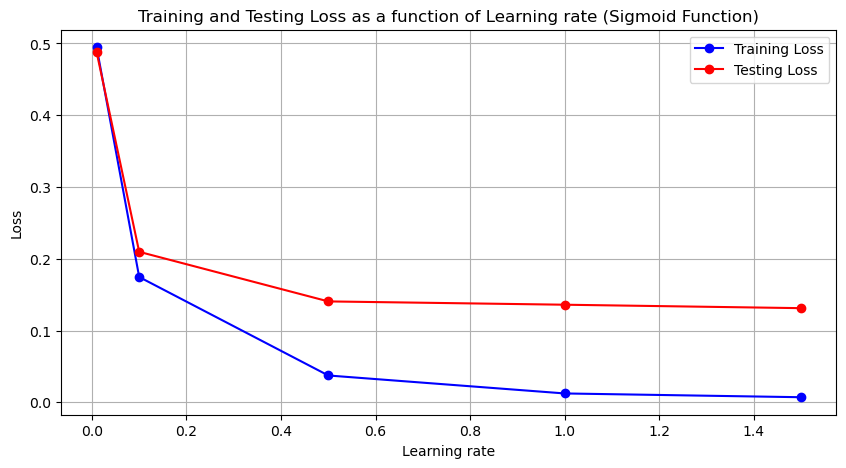

In [ ]:
# Plot graph of results
plt.figure(figsize=(10, 5))
plt.plot(learningrate_values, training_loss, label='Training Loss', color='blue', marker='o')
plt.plot(learningrate_values, testing_loss, label='Testing Loss', color='red', marker='o')
plt.title('Training and Testing Loss as a function of Learning rate (Sigmoid Function)')
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout
plt.show()

### 3.4 Evaluation of training and test loss using different values of dropout

Test dropout on a network with 1 hidden layer, 128 nodes using Sigmoid function. 

In [ ]:
# Initialise 3 lists for storing dropout value, train_loss and test_loss
dropout_value = []
training_loss = []
testing_loss = []

# Dropout = 0.0
# Create a neural network object
nn1 = MyNeuralNetwork(input_size=784, hidden_sizes=[128], output_size=10, activation_function='sigmoid',dropout=0.0)
# Train the neural network
losses,accuracies = nn1.train(X_train, y_train, learning_rate=0.5, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
dropout_value.append(0.0)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn1.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

# Dropout = 0.2
# Create a neural network object
nn2 = MyNeuralNetwork(input_size=784, hidden_sizes=[128], output_size=10, activation_function='sigmoid',dropout=0.2)
# Train the neural network
losses,accuracies = nn2.train(X_train, y_train, learning_rate=0.5, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
dropout_value.append(0.2)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn2.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

# Dropout = 0.5
# Create a neural network object
nn3 = MyNeuralNetwork(input_size=784, hidden_sizes=[128], output_size=10, activation_function='sigmoid',dropout=0.5)
# Train the neural network
losses,accuracies = nn3.train(X_train, y_train, learning_rate=0.5, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
dropout_value.append(0.5)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn3.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

# Dropout = 0.6
# Create a neural network object
nn4 = MyNeuralNetwork(input_size=784, hidden_sizes=[128], output_size=10, activation_function='sigmoid',dropout=0.6)
# Train the neural network
losses,accuracies = nn4.train(X_train, y_train, learning_rate=0.5, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
dropout_value.append(0.6)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn4.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

# Dropout = 0.8
# Create a neural network object
nn5 = MyNeuralNetwork(input_size=784, hidden_sizes=[128], output_size=10, activation_function='sigmoid',dropout=0.8)
# Train the neural network
losses,accuracies = nn5.train(X_train, y_train, learning_rate=0.5, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
dropout_value.append(0.8)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn5.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

Weights in layer : 0, Weights shape: (128, 784), Biases shape: (128, 1)
Weights in layer : 1, Weights shape: (10, 128), Biases shape: (10, 1)
The learning rate at epoch 0 is :0.5
In  epoch  0 loss  is : 0.63156 and accuracy is: 0.88512
In  epoch  1 loss  is : 0.36182 and accuracy is: 0.93800
In  epoch  2 loss  is : 0.28613 and accuracy is: 0.95140
In  epoch  3 loss  is : 0.24087 and accuracy is: 0.95977
In  epoch  4 loss  is : 0.20648 and accuracy is: 0.96553
In  epoch  5 loss  is : 0.18219 and accuracy is: 0.96983
In  epoch  6 loss  is : 0.16125 and accuracy is: 0.97412
In  epoch  7 loss  is : 0.14424 and accuracy is: 0.97640
In  epoch  8 loss  is : 0.13036 and accuracy is: 0.97910
In  epoch  9 loss  is : 0.11902 and accuracy is: 0.98098
The learning rate at epoch 10 is :0.25
In  epoch  10 loss  is : 0.10312 and accuracy is: 0.98435
In  epoch  11 loss  is : 0.09806 and accuracy is: 0.98547
In  epoch  12 loss  is : 0.09388 and accuracy is: 0.98637
In  epoch  13 loss  is : 0.09001 and a

[0.0, 0.2, 0.5, 0.6, 0.8] [0.061289794020042636, 0.15932161986605464, 0.3224594940510018, 0.4183990339785658, 0.8371064150840826] [0.13971656747385736, 0.2025392167540547, 0.3517943350378042, 0.44158512901466374, 0.830017357764859]


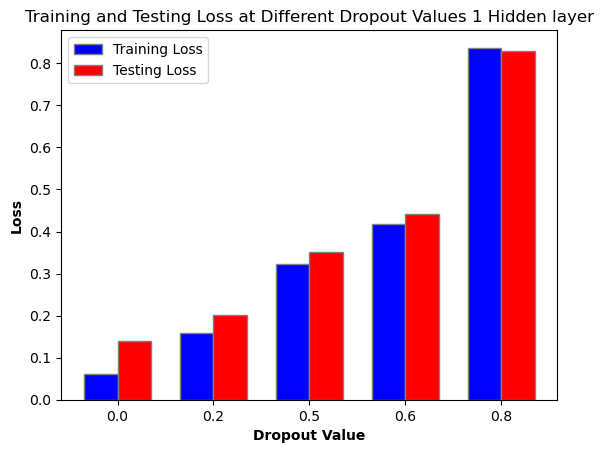

In [ ]:
print(dropout_value, training_loss, testing_loss)

# Create a bar chart of results
bar_width = 0.35
# Set position of bar on X axis
r1 = np.arange(len(training_loss))
r2 = [x + bar_width for x in r1]
# Make the plot
plt.bar(r1, training_loss, color='blue', width=bar_width, edgecolor='gray', label='Training Loss')
plt.bar(r2, testing_loss, color='red', width=bar_width, edgecolor='gray', label='Testing Loss')
plt.xlabel('Dropout Value', fontweight='bold')
plt.ylabel('Loss', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(training_loss))], dropout_value)
plt.title('Training and Testing Loss at Different Dropout Values 1 Hidden layer')
plt.legend()
plt.show()

Test dropout on a network with 2 hidden layers with 128 and 64 nodes respectively using Sigmoid function. 

In [ ]:
# Initialise 3 lists for storing dropout value, train_loss and test_loss
dropout_value = []
training_loss = []
testing_loss = []

# Dropout = 0.0
# Create a neural network object
nn1 = MyNeuralNetwork(input_size=784, hidden_sizes=[128,64], output_size=10, activation_function='sigmoid',dropout=0.0)
# Train the neural network
losses,accuracies = nn1.train(X_train, y_train, learning_rate=0.5, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
dropout_value.append(0.0)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn1.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

# Dropout = 0.2
# Create a neural network object
nn2 = MyNeuralNetwork(input_size=784, hidden_sizes=[128,64], output_size=10, activation_function='sigmoid',dropout=0.2)
# Train the neural network
losses,accuracies = nn2.train(X_train, y_train, learning_rate=0.5, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
dropout_value.append(0.2)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn2.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

# Dropout = 0.5
# Create a neural network object
nn3 = MyNeuralNetwork(input_size=784, hidden_sizes=[128,64], output_size=10, activation_function='sigmoid',dropout=0.5)
# Train the neural network
losses,accuracies = nn3.train(X_train, y_train, learning_rate=0.5, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
dropout_value.append(0.5)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn3.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

# Dropout = 0.6
# Create a neural network object
nn4 = MyNeuralNetwork(input_size=784, hidden_sizes=[128,64], output_size=10, activation_function='sigmoid',dropout=0.6)
# Train the neural network
losses,accuracies = nn4.train(X_train, y_train, learning_rate=0.5, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
dropout_value.append(0.6)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn4.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

# Dropout = 0.8
# Create a neural network object
nn5 = MyNeuralNetwork(input_size=784, hidden_sizes=[128,64], output_size=10, activation_function='sigmoid',dropout=0.8)
# Train the neural network
losses,accuracies = nn5.train(X_train, y_train, learning_rate=0.5, epochs=25, batch_size=64,decay_rate=0.1,decay_step=10)
dropout_value.append(0.8)
# Append last entry of train loss to dictionary for plotting
last_epoch_loss = losses[-1]
training_loss.append(last_epoch_loss)
# Test the neural network
loss,acc = nn5.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
# Append test loss to dictionary for plotting
testing_loss.append(loss)

Weights in layer : 0, Weights shape: (128, 784), Biases shape: (128, 1)
Weights in layer : 1, Weights shape: (64, 128), Biases shape: (64, 1)
Weights in layer : 2, Weights shape: (10, 64), Biases shape: (10, 1)
The learning rate at epoch 0 is :0.5
In  epoch  0 loss  is : 0.74189 and accuracy is: 0.86347
In  epoch  1 loss  is : 0.37149 and accuracy is: 0.93513
In  epoch  2 loss  is : 0.28387 and accuracy is: 0.95107
In  epoch  3 loss  is : 0.23262 and accuracy is: 0.95988
In  epoch  4 loss  is : 0.19680 and accuracy is: 0.96590
In  epoch  5 loss  is : 0.17043 and accuracy is: 0.97162
In  epoch  6 loss  is : 0.14824 and accuracy is: 0.97533
In  epoch  7 loss  is : 0.13075 and accuracy is: 0.97867
In  epoch  8 loss  is : 0.11566 and accuracy is: 0.98138
In  epoch  9 loss  is : 0.10409 and accuracy is: 0.98315
The learning rate at epoch 10 is :0.25
In  epoch  10 loss  is : 0.08430 and accuracy is: 0.98723
In  epoch  11 loss  is : 0.07872 and accuracy is: 0.98808
In  epoch  12 loss  is : 0.

[0.0, 0.2, 0.5, 0.6, 0.8] [0.03959958671816778, 0.21715010728345238, 0.5724894478525155, 0.8243423195668015, 2.1256633948201467] [0.15660372747349477, 0.24885062660076715, 0.5852759281794223, 0.8209538279538172, 2.1017888284885156]


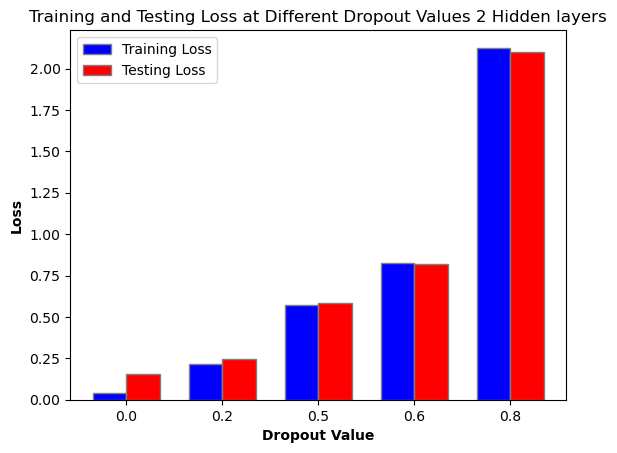

In [ ]:
print(dropout_value, training_loss, testing_loss)

# Create a bar chart of results
bar_width = 0.35
# Set position of bar on X axis
r1 = np.arange(len(training_loss))
r2 = [x + bar_width for x in r1]
# Make the plot
plt.bar(r1, training_loss, color='blue', width=bar_width, edgecolor='gray', label='Training Loss')
plt.bar(r2, testing_loss, color='red', width=bar_width, edgecolor='gray', label='Testing Loss')
plt.xlabel('Dropout Value', fontweight='bold')
plt.ylabel('Loss', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(training_loss))], dropout_value)
plt.title('Training and Testing Loss at Different Dropout Values 2 Hidden layers')
plt.legend()
plt.show()

### 3.5 Comparison of mini-batch and Stochastic Gradient Descent (SGD) Training

2 hidden layers (64, 16 nodes) Sigmoid function, dropout=0.25, learning rate =0.5, epochs=25, batch-size=64

In [ ]:
# Create a neural network object
nn1 = MyNeuralNetwork(input_size=784, hidden_sizes=[64,16], output_size=10, activation_function='sigmoid',dropout=0.25)

Weights in layer : 0, Weights shape: (64, 784), Biases shape: (64, 1)
Weights in layer : 1, Weights shape: (16, 64), Biases shape: (16, 1)
Weights in layer : 2, Weights shape: (10, 16), Biases shape: (10, 1)


In [ ]:
# Train the neural network
losses,accuracies = nn1.train(X_train, y_train, learning_rate=0.5, epochs=25, batch_size=64,decay_rate=0.0,decay_step=10)

The learning rate at epoch 0 is :0.5
In  epoch  0 loss  is : 1.82852 and accuracy is: 0.59392
In  epoch  1 loss  is : 1.09507 and accuracy is: 0.78518
In  epoch  2 loss  is : 0.91564 and accuracy is: 0.82628
In  epoch  3 loss  is : 0.82467 and accuracy is: 0.84442
In  epoch  4 loss  is : 0.76227 and accuracy is: 0.85872
In  epoch  5 loss  is : 0.71042 and accuracy is: 0.86747
In  epoch  6 loss  is : 0.67733 and accuracy is: 0.87515
In  epoch  7 loss  is : 0.63908 and accuracy is: 0.88032
In  epoch  8 loss  is : 0.61447 and accuracy is: 0.88697
In  epoch  9 loss  is : 0.58660 and accuracy is: 0.89183
The learning rate at epoch 10 is :0.5
In  epoch  10 loss  is : 0.57047 and accuracy is: 0.89363
In  epoch  11 loss  is : 0.55475 and accuracy is: 0.89772
In  epoch  12 loss  is : 0.54400 and accuracy is: 0.89958
In  epoch  13 loss  is : 0.52857 and accuracy is: 0.90228
In  epoch  14 loss  is : 0.51865 and accuracy is: 0.90485
In  epoch  15 loss  is : 0.50092 and accuracy is: 0.90875
In  epo

In [ ]:
# Test the neural network
loss,acc = nn1.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')

Test Loss: 0.4618159404210633, Test Accuracy: 0.9186


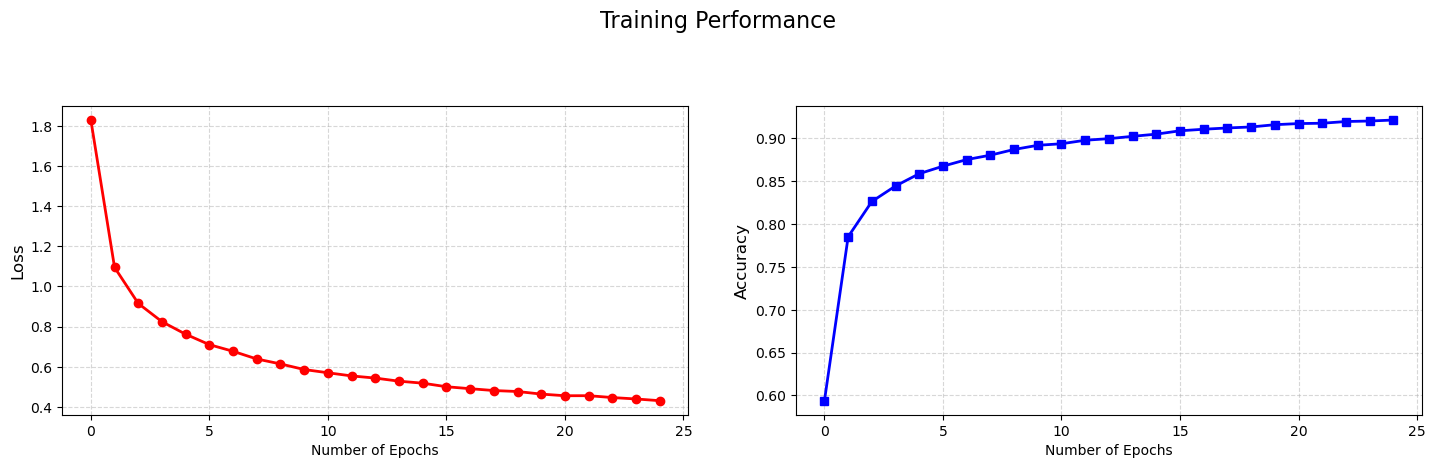

In [ ]:
#Plot the loss and accuracy curves for the training process 
#Show it next to each other in the same figure

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Training Performance', fontsize=16)
ax1.plot(losses, color='red', marker='o', linestyle='-', linewidth=2, markersize=6)
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Loss', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.5)
ax2.plot(accuracies, color='blue', marker='s', linestyle='-', linewidth=2, markersize=6)
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.5)
# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()

2 hidden layers (64, 16 nodes) Sigmoid function, dropout=0.25, learning rate = 0.5, epochs=10, batch-size=1 (SGD)

In [ ]:
nn6 = MyNeuralNetwork(input_size=784, hidden_sizes=[64,16], output_size=10, activation_function='sigmoid',dropout=0.25)

Weights in layer : 0, Weights shape: (64, 784), Biases shape: (64, 1)
Weights in layer : 1, Weights shape: (16, 64), Biases shape: (16, 1)
Weights in layer : 2, Weights shape: (10, 16), Biases shape: (10, 1)


In [ ]:
# Train the neural network
# Batch sizes, decay rate and learning rate changed !! 
losses,accuracies = nn6.train(X_train, y_train, learning_rate=0.5, epochs=25, batch_size=1,decay_rate=0.0,decay_step=10)

The learning rate at epoch 0 is :0.5
In  epoch  0 loss  is : 1.88828 and accuracy is: 0.62345
In  epoch  1 loss  is : 1.59704 and accuracy is: 0.70387
In  epoch  2 loss  is : 1.57163 and accuracy is: 0.71787
In  epoch  3 loss  is : 1.53587 and accuracy is: 0.72292
In  epoch  4 loss  is : 1.48883 and accuracy is: 0.73665
In  epoch  5 loss  is : 1.48776 and accuracy is: 0.73843
In  epoch  6 loss  is : 1.48780 and accuracy is: 0.73858
In  epoch  7 loss  is : 1.44973 and accuracy is: 0.74882
In  epoch  8 loss  is : 1.39775 and accuracy is: 0.76100
In  epoch  9 loss  is : 1.38950 and accuracy is: 0.76097
The learning rate at epoch 10 is :0.5
In  epoch  10 loss  is : 1.37747 and accuracy is: 0.76628
In  epoch  11 loss  is : 1.34887 and accuracy is: 0.77493
In  epoch  12 loss  is : 1.34782 and accuracy is: 0.77410
In  epoch  13 loss  is : 1.29808 and accuracy is: 0.78355
In  epoch  14 loss  is : 1.26457 and accuracy is: 0.79200
In  epoch  15 loss  is : 1.28384 and accuracy is: 0.78510
In  epo

In [ ]:
# Test the neural network
loss,acc = nn6.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')

Test Loss: 1.2904556636350788, Test Accuracy: 0.7657


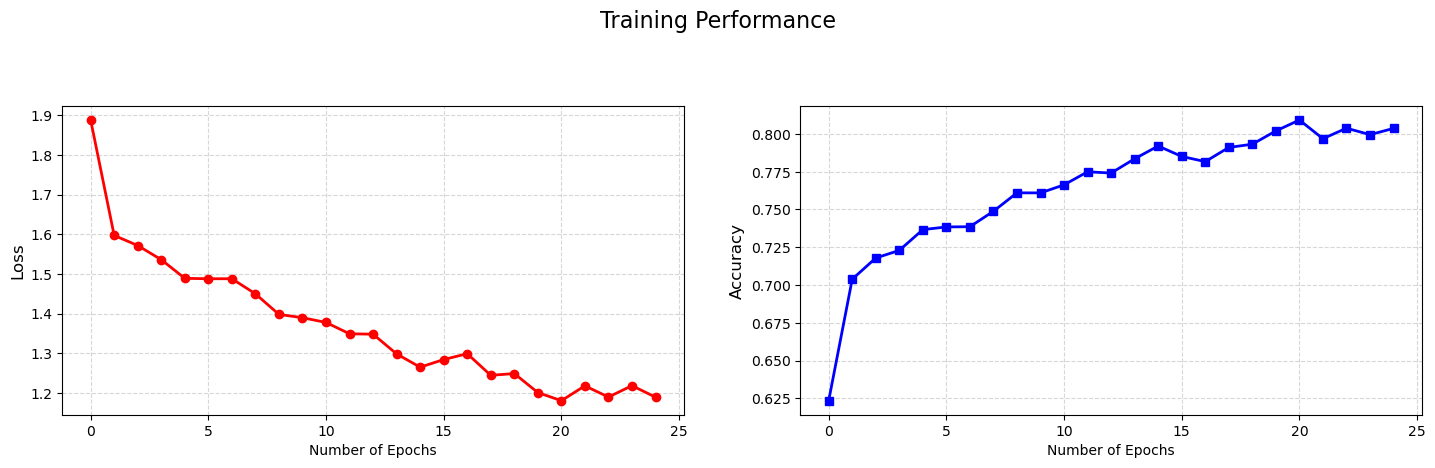

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Training Performance', fontsize=16)
ax1.plot(losses, color='red', marker='o', linestyle='-', linewidth=2, markersize=6)
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Loss', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.5)
ax2.plot(accuracies, color='blue', marker='s', linestyle='-', linewidth=2, markersize=6)
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.5)
# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()